# Computer Vision I (922 U0610) - Homework 5
Author: alanhc

ID: r10944007

Date: 10/21

## README
0. create env: `conda env create -f environment.yml`
1. enter env: `conda activate ntu-cv`
2. run jupyter `jupyter notebook`

Write programs which do gray-scale morphology on a gray-scale image(lena.bmp):
- (a) Dilation
- (b) Erosion
- (c) Opening
- (d) Closing

image shape: (512, 512)


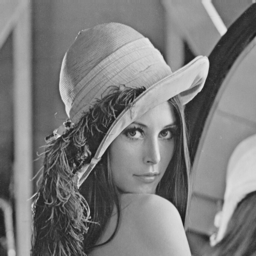

In [1]:
from PIL import Image
import numpy as np

# Todo: 讀檔，確定影像大小
img = Image.open("input/lena.bmp")
img = np.array(img)

h, w = img.shape

print("image shape:", img.shape)
show = Image.fromarray(img).resize((256,256))
show

In [2]:
import matplotlib.pyplot as plt
kernel_35553 = np.array([
    [0,1,1,1,0],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [0,1,1,1,0],
])

## Dilation

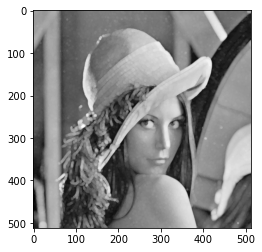

In [3]:
# Todo: Dilation
# Algorithm:
## 1. 取區域內最大
## 2. ans(y,x) = 區域內最大

def dilation(img, ans, kernel):
    def fill_Color(A, y,x,kernel,h,w):
        half_k_y = kernel.shape[0]//2
        half_k_x = kernel.shape[1]//2
        # 1. 取區域內最大
        _max = 0
        for ky in range(kernel.shape[0]):
            for kx in range(kernel.shape[1]):
                
                if (kernel[ky][kx]==1):
                    now_y, now_x = y+ky-half_k_y, x+kx-half_k_x 
                    if (now_y<0 or now_x<0 or now_y>h-1 or now_x>w-1):
                        # 邊界條件要跳過
                        continue
                    elif (A[now_y][now_x]>_max):
                        _max =  A[now_y][now_x]
        return _max
    
    for y in range(h):
        for x in range(w):
            # 2. ans(y,x) = 區域內最大
            ans[y][x] = fill_Color(img, y,x,kernel,h,w)
    return ans
img_dilation = dilation(img, np.zeros((h,w)), kernel_35553)
plt.imshow(img_dilation, cmap="gray")

## Erosion

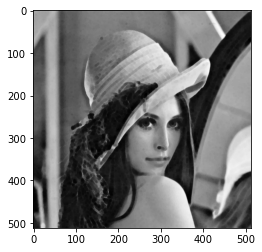

In [4]:
# Todo: Erosion
# Algorithm:
## 1. 取區域內最小
## 2. ans(y,x) = 取區域內最小
def erosion(img, ans, kernel):
    def fill_Color(A, y,x,kernel,h,w):
        half_k_y = kernel.shape[0]//2
        half_k_x = kernel.shape[1]//2
        # 1. 取區域內最小
        _min = 255
        for ky in range(kernel.shape[0]):
            for kx in range(kernel.shape[1]):
                
                if (kernel[ky][kx]==1):
                    now_y, now_x = y+ky-half_k_y, x+kx-half_k_x
                    if (now_y<0 or now_x<0 or now_y>h-1 or now_x>w-1):
                        continue
                    elif (A[now_y][now_x]<_min):
                        _min =  A[now_y][now_x]
        return _min
    for y in range(h):
        for x in range(w):
            # 2. ans(y,x) = 取區域內最小
                ans[y][x]=fill_Color(img, y,x,kernel,h,w)
    return ans
img_erosion = erosion(img, np.zeros((h,w)), kernel_35553)
plt.imshow(img_erosion, cmap="gray")

## Opening


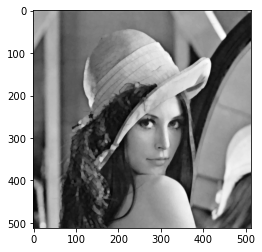

In [5]:
# Todo: Opening
# Algorithm:
## 1. 先erosion
## 2. 後dilation
img_opening = erosion(img, np.zeros((h,w)), kernel_35553)
img_opening = dilation(img_opening, np.zeros((h,w)), kernel_35553)
plt.imshow(img_opening, cmap="gray")

## Closing

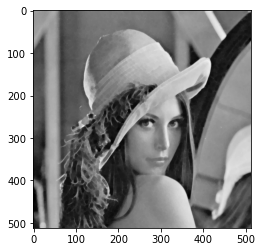

In [6]:
# Todo: Closing
# Algorithm:
## 1. 先dilation
## 2. 後erosion
img_closing = dilation(img, np.zeros((h,w)), kernel_35553)
img_closing = erosion(img_closing, np.zeros((h,w)), kernel_35553)
plt.imshow(img_closing, cmap="gray")

Ref
- https://youtu.be/7-FZBgrW4RE
- https://en.wikipedia.org/wiki/Opening_(morphology)
- https://en.wikipedia.org/wiki/Closing_(morphology)
- textbook



In [7]:
imgs = [img_dilation, img_erosion, img_opening, img_closing]
names = ["a_img_dilation", "b_img_erosion", "c_img_opening", "d_img_closing"]
for i in range(len(names)):
    im = Image.fromarray(imgs[i]).convert('RGB').save("output/"+names[i]+".png")